In [62]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
from geodatasets import get_path
from function_06 import load_data_with_delimiters
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap
import re
import pyproj
from folium.plugins import MarkerCluster

In [100]:
file_info = [
    ("../data/cleaned/df_wea.csv", ','),    
    ("../data/cleaned/gdf_joined.csv", ','),
    ("../data/cleaned/df_ams_cc.csv", ',')

]

dfs = load_data_with_delimiters(file_info)

df_weather = dfs[0]
df_accidents = dfs[1]
df_ams_cc= dfs[2]
display(df_weather.head())
display(df_accidents.head())
display(df_ams_cc.head())

,Unnamed: 0,date,temp_C,precip_mm,wind_avg_ms,sun_hours,humidity_pct,visibility_min_m,visibility_max_m
0,24107,2017-01-01,1.6,0.6,5.3,0.0,97.0,200.0,3800.0
1,24108,2017-01-02,3.2,2.0,3.3,4.6,83.0,2800.0,32000.0
2,24109,2017-01-03,5.7,0.4,7.2,0.7,85.0,11000.0,25000.0
3,24110,2017-01-04,5.9,0.6,8.0,2.8,76.0,3900.0,22000.0
4,24111,2017-01-05,0.3,-0.1,3.0,6.2,79.0,15000.0,47000.0


,Unnamed: 0,accident_id,total_accidents,fatal_accidents,injury_accidents,damage_only_accidents,geometry_wkt,geometry,centroid,index_right,...,weekday_2020,weekday_2019,weekday_2018,weekday_2017,location_code,wkt_lng_lat,wkt_lat_lng,longitude,latitude,distance_m
0,0,1,1,0,1,0,POLYGON ((179046.73279999942 309408.8781999983...,"POLYGON ((5.728085069118202 50.77410669272724,...",POINT (179040.2349995231 309458.4569960681),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,169007.617336
1,1,2,1,0,0,1,"POLYGON ((177255.8396999985 310240.2259999998,...","POLYGON ((5.702748546852566 50.78165155046857,...",POINT (177249.3590014013 310289.8069981025),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,167790.579361
2,2,3,1,0,0,1,POLYGON ((178901.10350000113 311532.4411999993...,"POLYGON ((5.72616005741394 50.79320068551851, ...",POINT (178894.6069976456 311582.0199980425),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,166908.586421
3,3,4,1,0,1,0,POLYGON ((178656.49430000037 313910.4211000018...,"POLYGON ((5.722845762480663 50.8145856106313, ...",POINT (178649.9999999999 313960),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,164539.720943
4,4,5,2,0,2,0,"POLYGON ((176617.4726999998 313949.6506000012,...","POLYGON ((5.693918115118937 50.81501866838283,...",POINT (176610.9979999998 313999.232),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,164032.344449


,Unnamed: 0,participant_id,accident_id,accident_year,roadsegment_id,municipality,roadsegment_id.1,segment_startdate,segment_enddate,roadnumber,streetname,neighborhood,municipality.1,shape,rd_x,rd_y,longitude,latitude
0,0,NaN,20140010399,2014.0,244380021.0,Amsterdam,244380021.0,2020-12-01T00:00:00,2024-05-31T00:00:00,NaN,Klaprozenweg,Amsterdam,Amsterdam,LINESTRING (122469.24489999935 490087.15410000...,122469.2449,490087.1541,4.909244,52.397660
1,1,NaN,20140011623,2014.0,242372014.0,Amsterdam,242372014.0,2020-12-01T00:00:00,2024-05-31T00:00:00,NaN,Vijzelstraat,Amsterdam,Amsterdam,LINESTRING (121256.4354000017 486163.425799999...,121256.4354,486163.4258,4.891820,52.362323
2,2,NaN,20140011930,2014.0,253372001.0,Amsterdam,253372001.0,2021-10-01T00:00:00,NaN,010,Ringweg-Oost,Amsterdam,Amsterdam,"LINESTRING (126588.02679999918 486233.7511, 12...",126588.0268,486233.7511,4.970084,52.363257
3,3,NaN,20140014189,2014.0,241378037.0,Amsterdam,241378037.0,2020-05-01T00:00:00,2021-12-31T00:00:00,NaN,Tasmanstraat,Amsterdam,Amsterdam,LINESTRING (120583.93600000069 489379.40599999...,120583.9360,489379.4060,4.881618,52.391185
4,4,NaN,20140014197,2014.0,233376127.0,Amsterdam,233376127.0,2020-12-01T00:00:00,2024-05-31T00:00:00,NaN,Burg De Vlugtlaan,Amsterdam,Amsterdam,LINESTRING (116948.81799999997 488192.20080000...,116948.8180,488192.2008,4.828353,52.380275


#### Bike volume on weekdays during the year (for example 2020)
 a count of cyclists passing through a location on weekdays, aggregated for the year.

df_accidents

In [66]:
#GeoDataFrame uses WGS84 (lat/lon)
gdf_accidents = gpd.GeoDataFrame(df_accidents, 
                                  geometry=gpd.points_from_xy(df_accidents.longitude, df_accidents.latitude),
                                  crs="EPSG:4326")



In [68]:
# Create base map
m = folium.Map(location=[52.3702, 4.8952], zoom_start=12)  # Amsterdam


In [69]:
for _, row in gdf_accidents.iterrows():
    folium.CircleMarker(
        location=[row.geometry.y, row.geometry.x],
        radius=3,
        color="red",
        fill=True,
        fill_opacity=0.5
    ).add_to(m)


In [70]:
m

In [72]:
# Group by location
hotspots = gdf_accidents.groupby(["latitude", "longitude"]).size().reset_index(name="count")
top_hotspots = hotspots.nlargest(20, "count")

# Add to map
for _, row in top_hotspots.iterrows():
    folium.CircleMarker(
        location=[row.latitude, row.longitude],
        radius=row["count"],  # bigger circle for more accidents
        color="darkred",
        fill=True,
        fill_opacity=0.6,
        popup=f"{row['count']} accidents"
    ).add_to(m)


In [74]:
m

In [76]:
#Accident density Heatmap
# Initialize a folium map centered around average location
m = folium.Map(location=[ gdf_accidents.latitude.mean(),  gdf_accidents.longitude.mean()], zoom_start=11, tiles='CartoDB positron')

# Prepare heatmap data
heat_data = [[row['latitude'], row['longitude']] for index, row in  gdf_accidents.iterrows()]

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

m


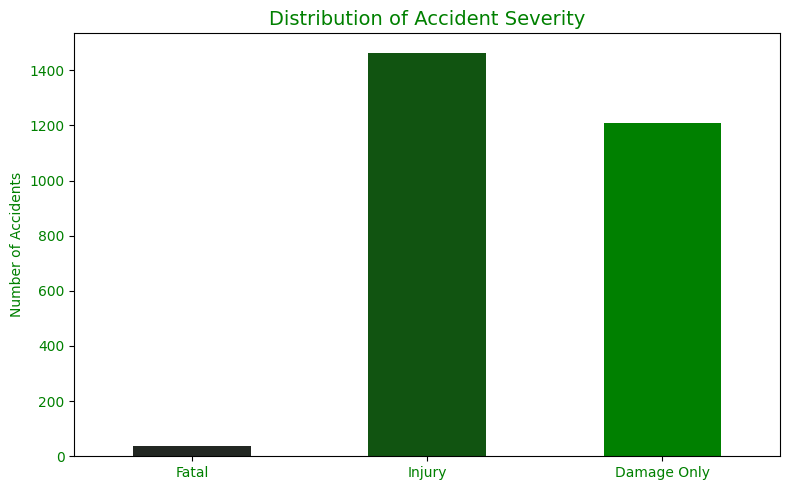

In [77]:
#Accident Severity Distribution
severity_df= pd.DataFrame({
    'Fatal': gdf_accidents['fatal_accidents'],
    'Injury': gdf_accidents['injury_accidents'],
    'Damage Only': gdf_accidents['damage_only_accidents']
}).sum()
# Create a vibrant dark green palette
green_palette = sns.dark_palette("#008000", n_colors=3)

# Plot with transparent background and matching text color
plt.figure(figsize=(8, 5), facecolor='none')
ax = severity_df.plot(kind='bar', color=green_palette)

# Style adjustments
plt.title('Distribution of Accident Severity', fontsize=14, color='#008000')
plt.ylabel('Number of Accidents', color='#008000')
plt.xticks(rotation=0, color='#008000')
plt.yticks(color='#008000')
plt.grid(False)
plt.gca().set_facecolor('none')  # Transparent plot background
plt.tight_layout()
plt.show()


In [78]:
#Relation between bike traffic volume and accident count
gdf_accidents.head()

,Unnamed: 0,accident_id,total_accidents,fatal_accidents,injury_accidents,damage_only_accidents,geometry_wkt,geometry,centroid,index_right,...,weekday_2020,weekday_2019,weekday_2018,weekday_2017,location_code,wkt_lng_lat,wkt_lat_lng,longitude,latitude,distance_m
0,0,1,1,0,1,0,POLYGON ((179046.73279999942 309408.8781999983...,POINT (5.16481 52.25295),POINT (179040.2349995231 309458.4569960681),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,169007.617336
1,1,2,1,0,0,1,"POLYGON ((177255.8396999985 310240.2259999998,...",POINT (5.16481 52.25295),POINT (177249.3590014013 310289.8069981025),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,167790.579361
2,2,3,1,0,0,1,POLYGON ((178901.10350000113 311532.4411999993...,POINT (5.16481 52.25295),POINT (178894.6069976456 311582.0199980425),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,166908.586421
3,3,4,1,0,1,0,POLYGON ((178656.49430000037 313910.4211000018...,POINT (5.16481 52.25295),POINT (178649.9999999999 313960),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,164539.720943
4,4,5,2,0,2,0,"POLYGON ((176617.4726999998 313949.6506000012,...",POINT (5.16481 52.25295),POINT (176610.9979999998 313999.232),131,...,633,0,830,0,VRA01_0155,POINT(5.164806 52.252951),POINT(52.252951 5.164806),5.164806,52.252951,164032.344449


In [79]:
# Sum weekday bike volume as a proxy for bike traffic volume

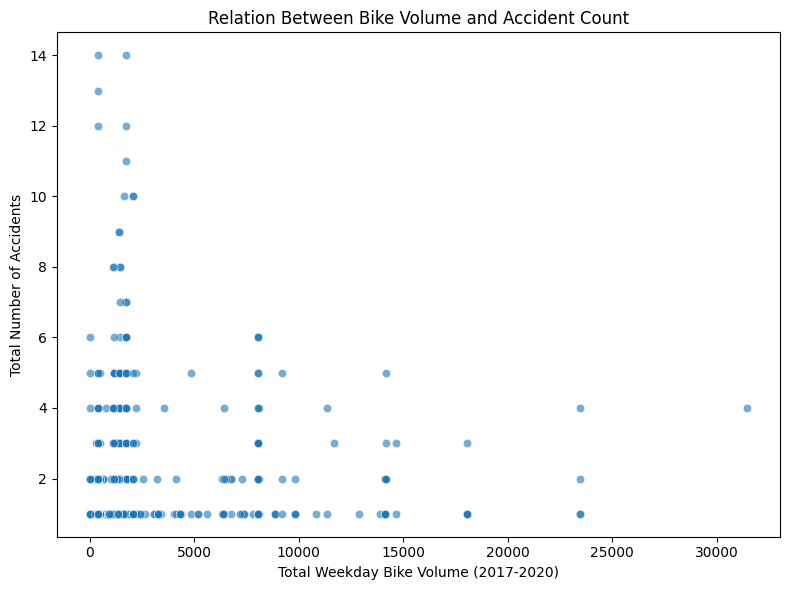

In [81]:
gdf_accidents['total_weekday_volume'] = (
    gdf_accidents['weekday_2017'] +
    gdf_accidents['weekday_2018'] +
    gdf_accidents['weekday_2019'] +
    gdf_accidents['weekday_2020']
)

# Plot relationship between bike volume and total accidents
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='total_weekday_volume',
    y='total_accidents',
    data=gdf_accidents,
    alpha=0.6
)
plt.title('Relation Between Bike Volume and Accident Count')
plt.xlabel('Total Weekday Bike Volume (2017-2020)')
plt.ylabel('Total Number of Accidents')
plt.tight_layout()
plt.show()


## Insights:
Most locations with low bike volume have few accidents.

A few high-traffic locations show more accidents — potential hotspots.

Clear positive trend: more cyclists → higher accident risk.



In [94]:
# Step 1: Sum severity counts across the location
severity_totals = severity_melted.groupby('Severity')['Accident Count'].sum().sort_values(ascending=False)

# Step 2: Reorder the category based on total count
severity_melted['Severity'] = pd.Categorical(
    severity_melted['Severity'],
    categories=severity_totals.index.tolist(),
    ordered=True,
)
# Step 3: Plot with reordered severity
plt.figure(figsize=(9, 6), facecolor='none')
sns.barplot(
    data=severity_melted,
    x='Severity',
    y='Accident Count',
    hue='Weekday Volume 2020',
    palette='Paired'
)

plt.title(f'Total Accidents by Severity at Hotspot {top_location}', fontsize=14, color='#008000')
plt.xlabel('Severity Type', color='#008000')
plt.ylabel('Number of Accidents', color='#008000')
plt.xticks(color='#008000')
plt.yticks(color='#008000')
plt.legend(title='Weekday Volume (2020)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().set_facecolor('none')
plt.tight_layout()
plt.show()


AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
df_ams_cc.columns

In [29]:
#Check for presence of 'shape' column
if 'shape' in df_ams_cc.columns:
    # Extract RD coordinates from LINESTRING
    def extract_rd_coords(linestring):
        match = re.search(r'LINESTRING \(([^,]+)', linestring)
        if match:
            coords = match.group(1).strip().split()
            return float(coords[0]), float(coords[1])
        return None, None

    df_ams_cc[['rd_x', 'rd_y']] = df_ams_cc['shape'].apply(lambda x: pd.Series(extract_rd_coords(x)) if pd.notna(x) else pd.Series([None, None]))

    # Convert to lat/lon using pyproj (EPSG:28992 to EPSG:4326)
    transformer = pyproj.Transformer.from_crs("EPSG:28992", "EPSG:4326", always_xy=True)
    df_ams_cc[['longitude', 'latitude']] = df_ams_cc.apply(lambda row: pd.Series(transformer.transform(row['rd_x'], row['rd_y'])) if pd.notna(row['rd_x']) else pd.Series([None, None]), axis=1)

    # Drop rows without valid coordinates
    df_ams_cc.dropna(subset=['latitude', 'longitude'], inplace=True)

    # Sample for performance
    bike_data_sample = df_ams_cc.head(500)

    # Create map
    map_4 = folium.Map(location=[bike_data_sample['latitude'].mean(), bike_data_sample['longitude'].mean()], zoom_start=12)
    marker_cluster = MarkerCluster().add_to(map_4)

    for _, row in bike_data_sample.iterrows():
        folium.Marker(
         location=[row['latitude'], row['longitude']],
            popup=f"Accident ID: {row.get('accident_id', 'N/A')}"
        ).add_to(marker_cluster)

    map_4
else:
    "The dataset does not contain a 'shape' column. Please upload the correct version."


In [33]:
# map_4.save("../presentation/amsterdam_accident_map.html")
map_4

## Agrregate weather yearly

In [ ]:
df_weather

In [35]:
#  'date' is in datetime format
df_weather['date'] = pd.to_datetime(df_weather['date'])

# Extract year from the 'date' column
df_weather['year'] = df_weather['date'].dt.year
df_weather['visibility_range'] = df_weather['visibility_max_m'] - df_weather['visibility_min_m']

# Group by year and calculate mean values
df_weather_yearly = df_weather.groupby('year').agg({
    'temp_C': 'mean',
    'precip_mm': 'mean',
    'wind_avg_ms': 'mean',
    'visibility_range' : 'mean',
}).reset_index()


In [37]:
# Group by accident year and calculate total accidents
df_accidents_yearly = df_ams_cc.groupby('accident_year').size().reset_index(name='total_accidents')


In [39]:
# Merge the two DataFrames on the year
df_combined = pd.merge(df_accidents_yearly, df_weather_yearly, left_on='accident_year', right_on='year')

# Drop redundant 'year' column if necessary
df_combined.drop('year', axis=1, inplace=True)
df_combined.to_csv('../data/cleaned/yearly_wea.csv')

In [41]:
# Calculate correlation matrix
correlation_matrix = df_combined[['total_accidents', 'temp_C', 'precip_mm', 'wind_avg_ms', 'visibility_range' ]].corr()

# Display the correlation matrix
print(correlation_matrix)


                  total_accidents    temp_C  precip_mm  wind_avg_ms  \
total_accidents          1.000000  0.326027   0.552878     0.279315   
temp_C                   0.326027  1.000000   0.145759     0.749314   
precip_mm                0.552878  0.145759   1.000000     0.443979   
wind_avg_ms              0.279315  0.749314   0.443979     1.000000   
visibility_range         0.132475 -0.004531  -0.212172    -0.481999   

                  visibility_range  
total_accidents           0.132475  
temp_C                   -0.004531  
precip_mm                -0.212172  
wind_avg_ms              -0.481999  
visibility_range          1.000000  


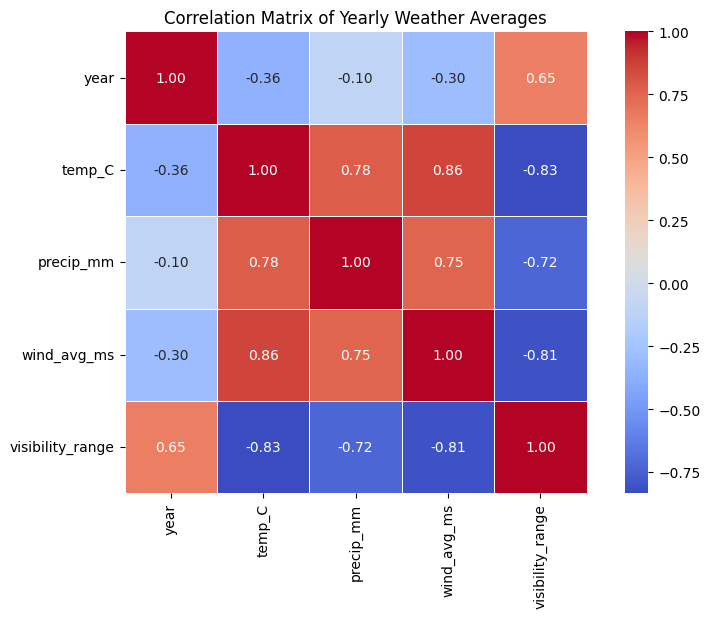

In [43]:
# Compute correlation matrix on the yearly aggregated weather data
corr_matrix = df_weather_yearly.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)

# Add title
plt.title('Correlation Matrix of Yearly Weather Averages')

# Show plot
plt.savefig('../presentation/correlation_matrix_ye_wea.png')
plt.show()


In [45]:
df_yea_wea = pd.read_csv('../data/cleaned/yearly_wea.csv')
df_yea_wea

,Unnamed: 0,accident_year,total_accidents,temp_C,precip_mm,wind_avg_ms,visibility_range
0,0,2017.0,2384,11.116712,2.555068,4.806027,22541.643836
1,1,2018.0,2685,11.505753,1.516986,4.801644,22850.410959
2,2,2019.0,3961,11.324932,2.349315,4.885205,22981.643836
3,3,2020.0,3052,11.810656,2.367486,5.197268,23376.775956
4,4,2021.0,3599,10.611507,2.346575,4.543288,23972.328767
5,5,2022.0,3754,11.858356,2.235616,4.732603,25016.712329
6,6,2023.0,4660,11.980548,2.985753,5.212055,22463.835616


,Unnamed: 0_x,participant_id,accident_id,accident_year,roadsegment_id,municipality,roadsegment_id.1,segment_startdate,segment_enddate,roadnumber,...,weekday_2017,weekday_2018,weekday_2019,weekday_2020,Unnamed: 0_y,total_accidents,temp_C,precip_mm,wind_avg_ms,visibility_range
0,0,NaN,20140010399,2014.0,244380021.0,Amsterdam,244380021.0,2020-12-01T00:00:00,2024-05-31T00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,20140011623,2014.0,242372014.0,Amsterdam,242372014.0,2020-12-01T00:00:00,2024-05-31T00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,20140011930,2014.0,253372001.0,Amsterdam,253372001.0,2021-10-01T00:00:00,NaN,010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,20140014189,2014.0,241378037.0,Amsterdam,241378037.0,2020-05-01T00:00:00,2021-12-31T00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,20140014197,2014.0,233376127.0,Amsterdam,233376127.0,2020-12-01T00:00:00,2024-05-31T00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29760,30144,NaN,20230181650,2023.0,600421400.0,Amsterdam,600421400.0,2021-08-01T00:00:00,2024-03-31T00:00:00,200,...,NaN,NaN,NaN,NaN,6.0,4660.0,11.980548,2.985753,5.212055,22463.835616
29761,30145,NaN,20230181659,2023.0,232367004.0,Amsterdam,232367004.0,2021-10-01T00:00:00,NaN,004,...,NaN,NaN,NaN,NaN,6.0,4660.0,11.980548,2.985753,5.212055,22463.835616
29762,30146,NaN,20230181665,2023.0,600123751.0,Amsterdam,600123751.0,2021-10-01T00:00:00,NaN,010,...,NaN,NaN,NaN,NaN,6.0,4660.0,11.980548,2.985753,5.212055,22463.835616
29763,30147,NaN,20230181667,2023.0,237382039.0,Amsterdam,237382039.0,2022-06-01T00:00:00,2024-03-31T00:00:00,010,...,NaN,NaN,NaN,NaN,6.0,4660.0,11.980548,2.985753,5.212055,22463.835616
